## 생존자 예측 데이터셋 인사이트

1. 기본 변수
 - PassengerId : 승객의 고유ID 식별 데이터로 생존율 예측 분석에는 영향을 끼치지 않음.

 - Survived : 승객의 생존. 데이터셋의 목표 변수. 0은 사망, 1은 생존을 의미함.

 - Pclass(객실 등급): 승객의 사회.경제적 지위에 대한 간접적 데이터. 생존율과 상관관계가 형성될 수 있는 변수. 지위가 높을수록 생존율이 높은 양의 상관관계를 형성할 가능성이 있음.

 - Name : 승객의 이름. 직접적으로 생존율 예측과의 상관관계는 없지만, 이름에서 추출한 Title(칭호)은 생존자 예측의 파생 변수가 될 수 있음.
칭호를 분류하자면, Mr(성인남성), Mrs/Mme(기혼여성), Master(젊은남자), Miss/Mlle(미혼여성), Dr(의사,박사), Rev(목사), Major/Capt(군인), Ms(여성) 같으므로 칭호를 통하여 나이와 성별, 지위등을 데이터에 반영할 수 있습니다.

 - Sex: 승객의 성별. 생존에 큰 영향을 미치는 변수로 예상됨. 여성 승객의 생존율이 남성 승객보다 높을 가능성이 있습니다.

 - Age: 승객의 나이. 생존에 영향을 미칠 수 있는 변수로 보임. Age_group 파생변수를 통해 연령대 범주를 나누어 분석할 수 있음.

 - SibSp (형제자매/배우자 수): 가족 관계를 나타내며, 혼자인 승객과 가족과 함께 여행한 승객의 생존율을 확인할 수 있음.

 - Parch (부모/자녀 수): 가족 관계를 나타내며, SibSp와 함께 결합하여 Family_size를 계산할 수 있습니다. 혼자인 승객, 소규모 가족, 대규모 가족과 탑승한 승객들 간의 생존율 차이를 분석할 수 있음.

 - Ticket: 승선 티켓 번호. 객실 등급과 데이터 성격이 중복되게 보이므로 분석에 도움이 되지 않아보임.

 - Fare: 승객이 지불한 비용. 높은 금액을 지불한 승객일수록 객실 등급 내에서도 보다 더 좋은 객실에 머물 수 있음. 보다 경제적 지위에 따른 생존율을 분석하는데 사용할 수 있는 데이터로 보임.

 - Cabin: 객실 번호. 객실 번호의 첫글자를 추출하여 'A~F,T' 객실 위치에 따른 생존률과의 상관관계를 분석할 수 있음.

 - Embarked: 승객이 탑승한 항구. 생존률 예측 분석에 영향이 미미할 것으로 보임.

2. 파생변수
 - Title (칭호): 'Name' 에서 추출한 칭호는 승객의 기혼여부, 사회적 지위, 나이, 성별에 따른 생존률을 분석할 수 있음.

 - Age_group: 나이를 그룹으로 나누어 연령대별(어린이, 성인, 노인) 생존율을 분석할 수 있음.

 - Fare: 비용을 그룹으로 나누어 지불한 비용의 그룹에 따라 높은 금액을 지불한 승객일수록 생존율에 어떤 영향이 있는지 분석할 수 있음.

 - Family_size: 혼자인 승객, 가족이 많은 승객, 적은 승객들 간의 생존율 차이를 분석할 수 있음.

 - Cabin_prefix: 객실의 첫 글자를 추출하여 객실의 위치와 생존율의 관계를 분석할 수 있음.

## 결론
이 인사이트를 바탕으로, 주어진 데이터와 파생변수를 통해 생존자 예측 모델을 구축할 때 더 나은 성능을 기대할 수 있습니다. 각 변수와 파생변수가 생존율에 미치는 영향을 분석하고 이를 모델에 반영함으로써, 더 정확한 예측을 할 수 있습니다.

Task1. train.csv 파일로 생존자 예측 모델 생성을 위한 분석용 데이터 셋을 작성하세요.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('train.csv')

Saving train.csv to train (6).csv


In [57]:
# 파생변수 생성
df2 = df.copy()

# 칭호 추출
df2['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
bins = [0,5,12,18,35,60,120]
# 연령대 구분
labels = ['Infant', 'Child', 'Teenager', 'Young_Adult', 'Adult', 'Senior']
df2['Age_group'] = pd.cut(df2['Age'], bins=bins, labels=labels)
# 비용 구분
fare_bins = [0,100,500,1000]
fare_labels = ['Low','Medium','High']
df2['fare_group'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels)
# 가족 병합
df2['family_size'] = df2['SibSp'] + df2['Parch'] + 1
# 객실위치 추출
df2['Cabin_prefix'] = df2['Cabin'].str[0]

In [58]:
# 성별 분류 - 데이터화
df2.Sex.replace({'male':0, 'female':1}, inplace = True)

In [59]:
# 데이터 전처리 - 필요없는 열 제거
df2.drop(columns=['Name', 'Ticket','PassengerId','Cabin','Embarked', 'Age', 'Fare', 'SibSp', 'Parch'], inplace=True)

In [60]:
# 결측치 확인
missing_values = df2.isnull().sum()
print(missing_values)

Survived          0
Pclass            0
Sex               0
Title             0
Age_group       177
fare_group       15
family_size       0
Cabin_prefix    687
dtype: int64


In [61]:
# 데이터 전처리 - 결측치
# Age_group
mode_value = df2['Age_group'].mode(dropna=True)[0]
df2['Age_group'].fillna(mode_value, inplace = True)
# fare_group
mode_value = df2['fare_group'].mode(dropna=True)[0]
df2['fare_group'].fillna(mode_value, inplace = True)
# Cabin_prefix
df2['Cabin_prefix'].fillna('Unknown', inplace=True)

In [62]:
# 범주형 변수를 더미 변수로 변환
categorical_columns = ['Sex', 'Title', 'Age_group', 'fare_group', 'Cabin_prefix']
df2 = pd.get_dummies(df2, columns=categorical_columns, drop_first=True)

# 타겟 변수 설정
target_variable = 'Survived'

# 데이터셋 확인
print(df2.head())

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df2.drop(columns=[target_variable]))

# 표준화된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_features, columns=df2.columns.drop(target_variable))
scaled_df[target_variable] = df2[target_variable].values

# 데이터셋 확인
print(scaled_df.head())

   Survived  Pclass  family_size  Sex_1  Title_Col  Title_Countess  Title_Don  \
0         0       3            2  False      False           False      False   
1         1       1            2   True      False           False      False   
2         1       3            1   True      False           False      False   
3         1       1            2   True      False           False      False   
4         0       3            1  False      False           False      False   

   Title_Dr  Title_Jonkheer  Title_Lady  ...  fare_group_Medium  \
0     False           False       False  ...              False   
1     False           False       False  ...              False   
2     False           False       False  ...              False   
3     False           False       False  ...              False   
4     False           False       False  ...              False   

   fare_group_High  Cabin_prefix_B  Cabin_prefix_C  Cabin_prefix_D  \
0            False           False      

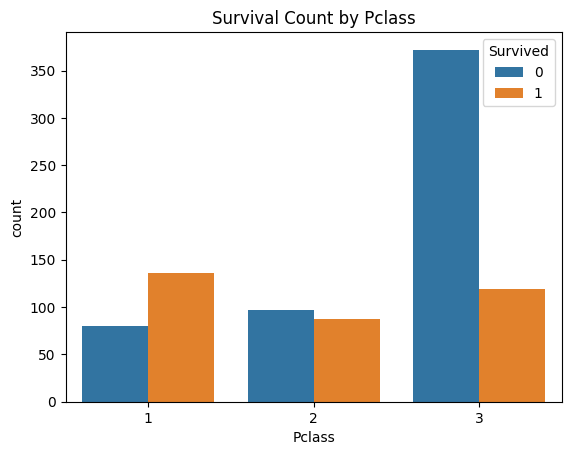

In [74]:
sns.countplot(x='Pclass', hue='Survived', data=df2)
plt.title('Survival Count by Pclass')
plt.show()

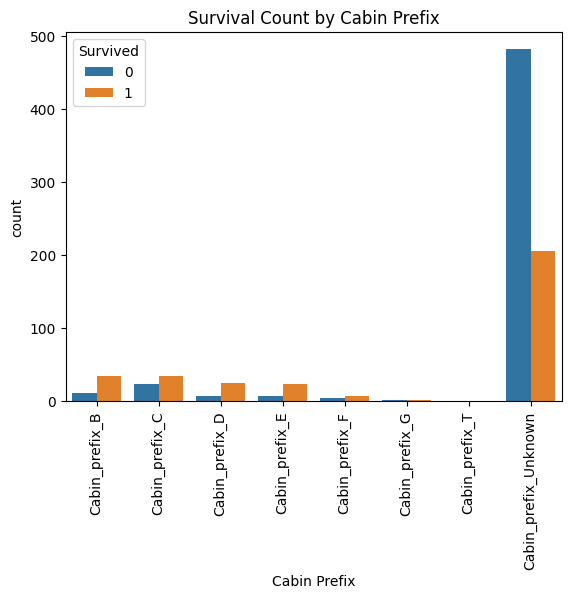

In [75]:
cabin_prefixes = [col for col in df2.columns if col.startswith('Cabin_prefix_')]
df2_melted = df2.melt(id_vars=['Survived'], value_vars=cabin_prefixes, var_name='Cabin Prefix', value_name='Count')
df2_melted = df2_melted[df2_melted['Count'] == True]

sns.countplot(x='Cabin Prefix', hue='Survived', data=df2_melted)
plt.title('Survival Count by Cabin Prefix')
plt.xticks(rotation=90)
plt.show()


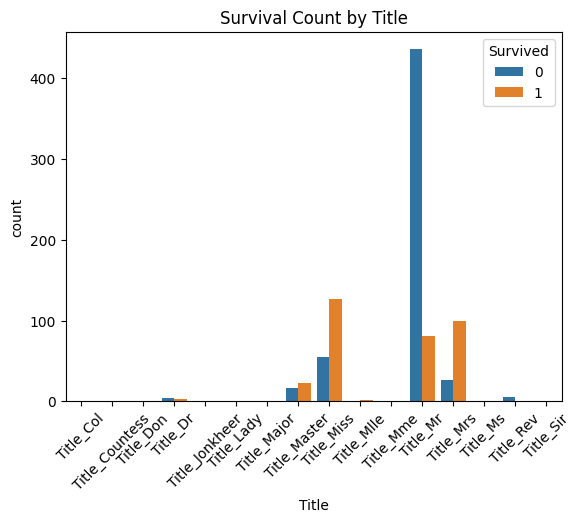

In [94]:
Title = [col for col in df2.columns if col.startswith('Title')]
df2_melted = df2.melt(id_vars=['Survived'], value_vars=Title, var_name='Title', value_name='Count')
df2_melted = df2_melted[df2_melted['Count'] == True]

sns.countplot(x='Title', hue='Survived', data=df2_melted)
plt.title('Survival Count by Title')
plt.xticks(rotation=45)
plt.show()

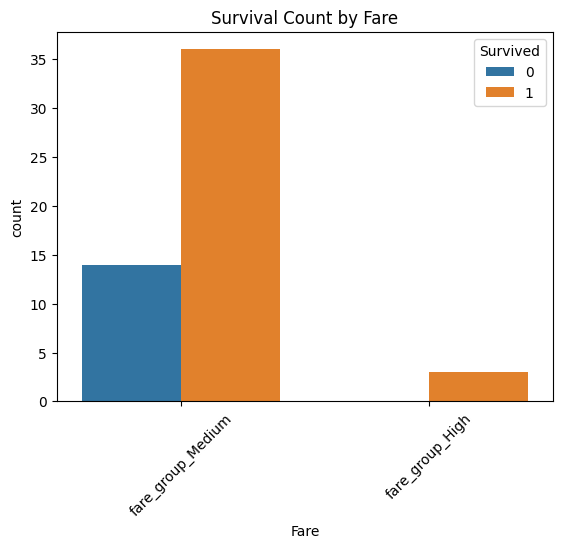

In [95]:
fare_groups = ['fare_group_Medium', 'fare_group_High']
df2_melted = df2.melt(id_vars=['Survived'], value_vars=fare_groups, var_name='Fare', value_name='Count')
df2_melted = df2_melted[df2_melted['Count'] == True]

sns.countplot(x='Fare', hue='Survived', data=df2_melted)
plt.title('Survival Count by Fare')
plt.xticks(rotation=45)
plt.show()

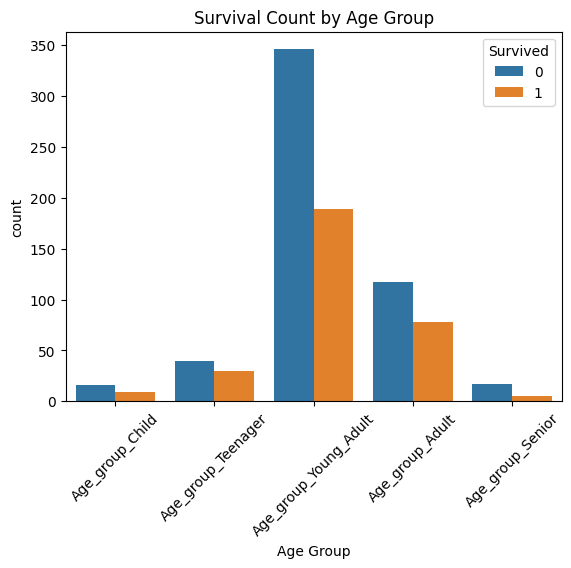

In [97]:
age_groups = ['Age_group_Child', 'Age_group_Teenager', 'Age_group_Young_Adult', 'Age_group_Adult', 'Age_group_Senior']
df2_melted = df2.melt(id_vars=['Survived'], value_vars=age_groups, var_name='Age Group', value_name='Count')
df2_melted = df2_melted[df2_melted['Count'] == True]

sns.countplot(x='Age Group', hue='Survived', data=df2_melted)
plt.title('Survival Count by Age Group')
plt.xticks(rotation=45)
plt.show()

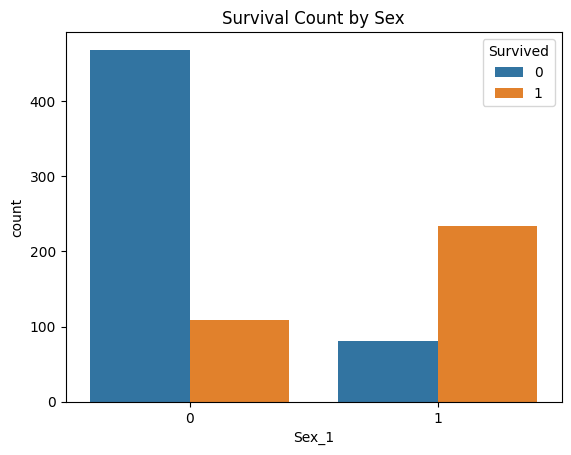

In [99]:
sns.countplot(x='Sex_1', hue='Survived', data=df2)
plt.title('Survival Count by Sex')
plt.show()

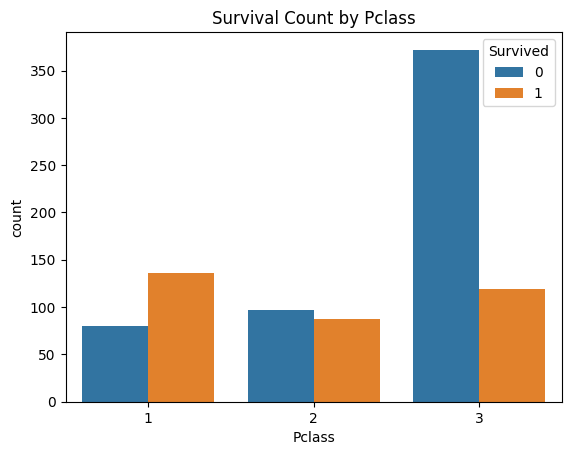

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Pclass', hue='Survived', data=df2)
plt.title('Survival Count by Pclass')
plt.show()

In [102]:
# 타겟 변수와 피처 변수 설정
X = df2.drop('Survived', axis=1)
y = df2['Survived']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 크기 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 교차 검증을 통한 모델 성능 평가
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
# print("Cross Validation Scores:", cv_scores)
# print("Mean CV Score:", np.mean(cv_scores))

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

(712, 34) (179, 34) (712,) (179,)
Accuracy: 0.8212290502793296
